In [28]:
# Importation de la librairie
import pandas as pd # manipulation de la donnée
import matplotlib.pyplot as plt # création de graphique

# Création de graphique présentable
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.grid"] = True

print("Yaay, Pandas et Matplotlib sont chargés correctement !")
print("Les animés sont prêts à être analysé !")

Yaay, Pandas et Matplotlib sont chargés correctement !
Les animés sont prêts à être analysé !


In [29]:
#Charger le ficher CSV des animés
df = pd.read_csv("animes.csv")

print("Ficher chargé avec succès, ENFIN !")
print(f"Nombre d'animés {len(df)}")

Ficher chargé avec succès, ENFIN !
Nombre d'animés 73


In [30]:
# Taille du tableau
lignes, colonnes = df.shape

print(f"Le tableau contient :")
print(f" -{lignes} lignes (= {lignes} animés)")
print(f" -{colonnes} colonnes (= types d'infos)")

Le tableau contient :
 -73 lignes (= 73 animés)
 -17 colonnes (= types d'infos)


In [32]:
# Affichage de toutes les colonnes
print("Colonnes dispos :")
print("-" * 40)

for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")


Colonnes dispos :
----------------------------------------
  1. Anime
  2. Genre_Tags
  3. Source
  4. Nb_Episodes
  5. Status
  6. Studio
  7. Date_Pub
  8. Note_Globale
  9. Note_Meilleur_Ep
  10. Meilleur_Ep_Titre
  11. Comm_Meilleur_Ep
  12. Note_Pire_Ep
  13. Pire_Ep_Titre
  14. Comm_Pire_Ep
  15. Comm_Saison_1
  16. Comm_Saison_2
  17. Comm_Saison_3


In [33]:
# Stats des colonnes 
df.describe().round(2)

,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,73.00,73.00,73.00,73.00
mean,80.86,8.30,9.31,6.75
std,149.95,0.51,0.45,1.32
min,3.00,6.00,8.20,0.00
25%,24.00,8.10,9.10,6.30
50%,32.00,8.40,9.40,7.20
75%,74.00,8.60,9.70,7.50
max,1090.00,9.30,9.90,8.40


In [34]:
#La colonnes des notes
notes = df["Note_Globale"]

print("Colonne 'Note_Globale' :")
print(f"    Nombre de valeurs : {len(notes)}")
print(f"    Les dix premières notes :")
print(notes.head(10).to_string())

Colonne 'Note_Globale' :
    Nombre de valeurs : 73
    Les dix premières notes :
0    8.4
1    8.2
2    8.7
3    9.1
4    8.8
5    7.2
6    8.2
7    8.3
8    8.7
9    8.2


In [35]:
# Les noms d'animés en majuscules
noms_majuscules = df['Anime'].str.upper()

print("TOUT EST EN MAJUSCULE :")
print(noms_majuscules.head(10).to_string())

TOUT EST EN MAJUSCULE :
0                              NARUTO
1                              TRIGUN
2                       DRAGON BALL Z
3    FULLMETAL ALCHEMIST: BROTHERHOOD
4                        COWBOY BEBOP
5                    SWORD ART ONLINE
6                             RE:ZERO
7                           DR. STONE
8                           ONE PIECE
9                           BLUE LOCK


In [36]:
# Extraction du genre principal
df['Genre_Principal'] = df['Genre_Tags'].str.split(' / ').str[0]

print("Genre principal :")
print(df[['Anime', 'Genre_Tags', 'Genre_Principal']].head(10))

Genre principal :
                              Anime              Genre_Tags Genre_Principal
0                            Naruto         Action / Shonen          Action
1                            Trigun         Sci-Fi / Action          Sci-Fi
2                     Dragon Ball Z         Action / Shonen          Action
3  Fullmetal Alchemist: Brotherhood     Aventure / Military        Aventure
4                      Cowboy Bebop           Sci-Fi / Noir          Sci-Fi
5                  Sword Art Online        Isekai / Romance          Isekai
6                           Re:Zero  Isekai / Psychologique          Isekai
7                         Dr. Stone      Sci-Fi / Adventure          Sci-Fi
8                         One Piece      Adventure / Shonen       Adventure
9                         Blue Lock        Sport / Thriller           Sport


In [ ]:
# Convertion Date_Pub en format date
df['Date_Pub'] = pd.to_datetime(df['Date_Pub'])

# Extraction de l'année de publication
df['Annee'] = df['Date_Pub'].dt.year

print("Dates extraite :")
print(df[['Anime', 'Date_Pub', 'Annee']].head(10))

Dates extraite :
                              Anime   Date_Pub  Annee
0                            Naruto 2002-10-03   2002
1                            Trigun 1998-04-01   1998
2                     Dragon Ball Z 1989-04-26   1989
3  Fullmetal Alchemist: Brotherhood 2009-04-05   2009
4                      Cowboy Bebop 1998-04-03   1998
5                  Sword Art Online 2012-07-08   2012
6                           Re:Zero 2016-04-04   2016
7                         Dr. Stone 2019-07-05   2019
8                         One Piece 1999-10-20   1999
9                         Blue Lock 2022-10-09   2022


In [69]:
# Nettoyage des doublons
# On garde la première version, on jette les copies
df = df.drop_duplicates(subset=['Anime'], keep='first')

print(f" Doublons supprimés. Il reste {len(df)} animés.")


 Doublons supprimés. Il reste 70 animés.


In [39]:
# Compter les données manquantes par colonne
print("Recherche de données manquantes...")
print(df.isnull().sum())


Recherche de données manquantes...
Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
Genre_Principal       0
Annee                 0
dtype: int64


In [43]:
# Remplacer les trous dans les colonnes par "N/A"
colonnes_texte = ['Comm_Saison_3'] 

for col in colonnes_texte:
    df[col] = df[col].fillna("N/A")

print("Vérification test...")
print(df.isnull().sum())

Vérification test...
Anime                0
Genre_Tags           0
Source               0
Nb_Episodes          0
Status               0
Studio               0
Date_Pub             0
Note_Globale         0
Note_Meilleur_Ep     0
Meilleur_Ep_Titre    0
Comm_Meilleur_Ep     0
Note_Pire_Ep         0
Pire_Ep_Titre        0
Comm_Pire_Ep         0
Comm_Saison_1        0
Comm_Saison_2        0
Comm_Saison_3        0
Genre_Principal      0
Annee                0
dtype: int64


In [44]:
# On ne garde que les animés où la note du Pire Épisode est supérieure ou égale à 1
df = df[df['Note_Pire_Ep'] >= 1]

# On réinitialise les numéros de lignes pour que ce soit propre
df = df.reset_index(drop=True)

print(f"Nettoyage terminé ! Il reste {len(df)} animés valides.")


Nettoyage terminé ! Il reste 70 animés valides.


In [45]:
# Sauvegarde de la data nettoyé 
df.to_csv("animes_clean_final.csv", index=False)

In [46]:
import numpy as np # On a besoin de numpy pour calculer 

# 1. Calcul de l'Écart 
df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']

# 2. Calcul de la Régularité
df['Regularite'] = 10 - df['Ecart']

# 3. Calcul de la Longueur
df['Longueur'] = np.log(df['Nb_Episodes'])

print("Colonnes 'Ecart', 'Regularite' et 'Longueur' créées !")
df.head()


Colonnes 'Ecart', 'Regularite' et 'Longueur' créées !


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,...,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3,Genre_Principal,Annee,Ecart,Regularite,Longueur
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,...,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.,Action,2002,3.8,6.2,5.393628
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),...,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...,Sci-Fi,1998,2.6,7.4,3.258097
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,...,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é...",Action,1989,3.5,6.5,5.673323
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,...,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo...",Aventure,2009,3.3,6.7,4.158883
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,...,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.,Sci-Fi,1998,2.5,7.5,3.258097


In [47]:
# Trier par Note_Globale 
df_trie = df.sort_values('Note_Globale', ascending=False)

print("Top 10 des animés par note :")
print(df_trie[['Anime', 'Note_Globale', 'Studio']].head(10).to_string(index=False))

Top 10 des animés par note :
                           Anime  Note_Globale             Studio
   Frieren: Beyond Journey's End           9.3           Madhouse
Fullmetal Alchemist: Brotherhood           9.1              Bones
                     Steins;Gate           9.1          White Fox
          Hunter x Hunter (2011)           9.0           Madhouse
                         Monster           8.9           Madhouse
                    Cowboy Bebop           8.8            Sunrise
                  Hajime no Ippo           8.8           Madhouse
                    Vinland Saga           8.8 Wit Studio / MAPPA
    Les Carnets de l'apothicaire           8.8                OLM
                   Dragon Ball Z           8.7     Toei Animation


In [48]:
# Filtrer les animés avec une note supérieure à 8.5
excellents = df[df['Note_Globale'] > 8.5]

print(f"{len(excellents)} animés ont une note > 8.5 :")
print(excellents[['Anime', 'Note_Globale']].to_string(index=False))

22 animés ont une note > 8.5 :
                           Anime  Note_Globale
                   Dragon Ball Z           8.7
Fullmetal Alchemist: Brotherhood           9.1
                    Cowboy Bebop           8.8
                       One Piece           8.7
                       Haikyuu!!           8.7
    Les Carnets de l'apothicaire           8.8
                      Death Note           8.6
          Hunter x Hunter (2011)           9.0
                      Code Geass           8.7
                     Steins;Gate           9.1
                             GTO           8.7
                        Mushishi           8.7
                  Jujutsu Kaisen           8.6
   Frieren: Beyond Journey's End           9.3
               Your Lie in April           8.6
                         Monster           8.9
                  Hajime no Ippo           8.8
                    Vinland Saga           8.8
                   Made in Abyss           8.6
      Tengen Toppa Gurren Lag

In [49]:
# Animés avec note > 8 ET qui sont terminés
condition1 = df['Note_Globale'] > 8
condition2 = df['Status'] == 'Fini'

bons_finis = df[condition1 & condition2]

print(f"{len(bons_finis)} animés avec note > 8 ET terminés :")
print(bons_finis[['Anime', 'Note_Globale', 'Status']].head(10).to_string(index=False))

35 animés avec note > 8 ET terminés :
                           Anime  Note_Globale Status
                          Naruto           8.4   Fini
                          Trigun           8.2   Fini
                   Dragon Ball Z           8.7   Fini
Fullmetal Alchemist: Brotherhood           9.1   Fini
                    Cowboy Bebop           8.8   Fini
                         Re:Zero           8.2   Fini
                       Haikyuu!!           8.7   Fini
        Du mouvement de la Terre           8.4   Fini
                Samurai Champloo           8.5   Fini
            L'Attaque des Titans           8.5   Fini


In [50]:
# Moyenne des notes
note_moyenne = df['Note_Globale'].mean()

print(f"Note moyenne des animés : {note_moyenne:.2f} / 10")

# Moyenne du nombre d'épisodes
episodes_moyen = df['Nb_Episodes'].mean()
print(f"Nombre moyen d'épisodes : {episodes_moyen:.0f}")

Note moyenne des animés : 8.31 / 10
Nombre moyen d'épisodes : 83


In [51]:
# Note la plus haute et la plus basse
note_max = df['Note_Globale'].max()
note_min = df['Note_Globale'].min()

print(f"⭐ Note la plus haute : {note_max}")
print(f"📉 Note la plus basse : {note_min}")

# Quel animé a la meilleure note ?
meilleur = df[df['Note_Globale'] == note_max]['Anime'].values[0]
print(f"Le mieux noté : {meilleur}")

⭐ Note la plus haute : 9.3
📉 Note la plus basse : 6.0
Le mieux noté : Frieren: Beyond Journey's End


In [52]:
# Compter les animés par statut
print("Répartition par statut :")
print(df['Status'].value_counts())

print("\n" + "="*40 + "\n")

# Top 5 des studios avec le plus d'animés
print("Top 5 des studios :")
print(df['Studio'].value_counts().head(5))

Répartition par statut :
Status
Fini        44
En cours    23
En pause     3
Name: count, dtype: int64


Top 5 des studios :
Studio
Madhouse          12
Studio Pierrot     8
A-1 Pictures       6
Bones              5
White Fox          3
Name: count, dtype: int64


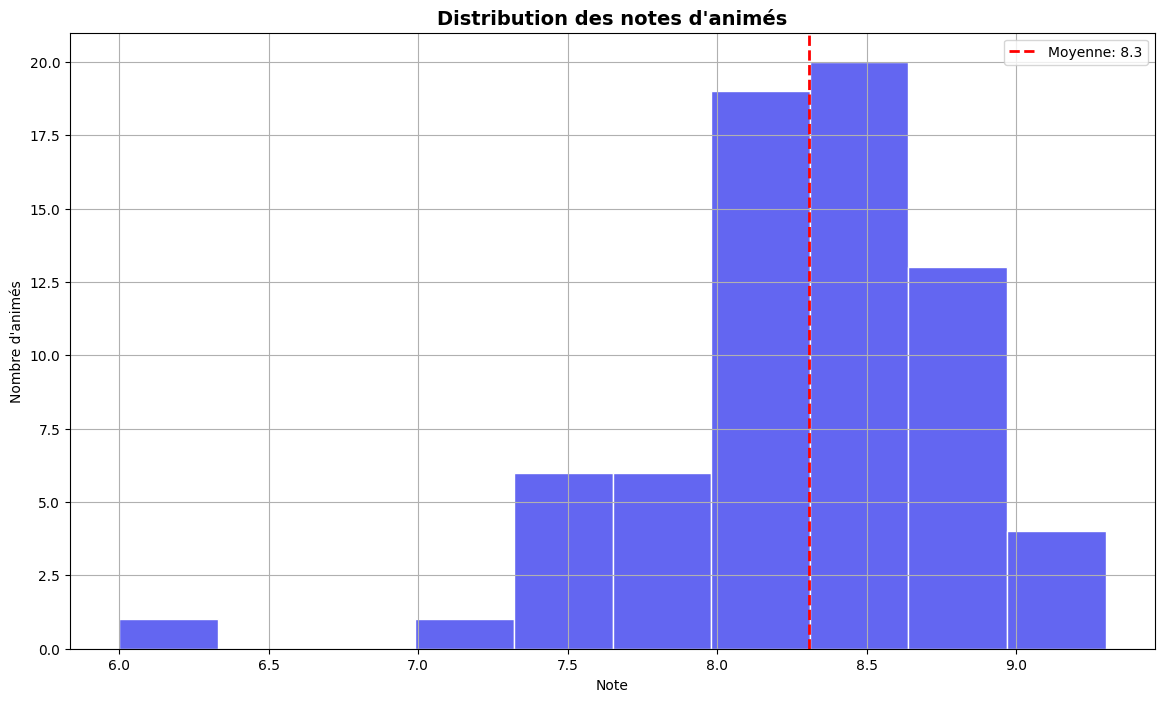

La ligne rouge montre la moyenne !


In [53]:
# Histogramme des notes
plt.figure(figsize=(14, 8))

plt.hist(df['Note_Globale'], bins=10, color='#6366f1', edgecolor='white')

# Ajouter la moyenne
moyenne = df['Note_Globale'].mean()
plt.axvline(moyenne, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {moyenne:.1f}')

plt.title("Distribution des notes d'animés", fontsize=14, fontweight='bold')
plt.xlabel("Note")
plt.ylabel("Nombre d'animés")
plt.legend()
plt.show()

print("La ligne rouge montre la moyenne !")

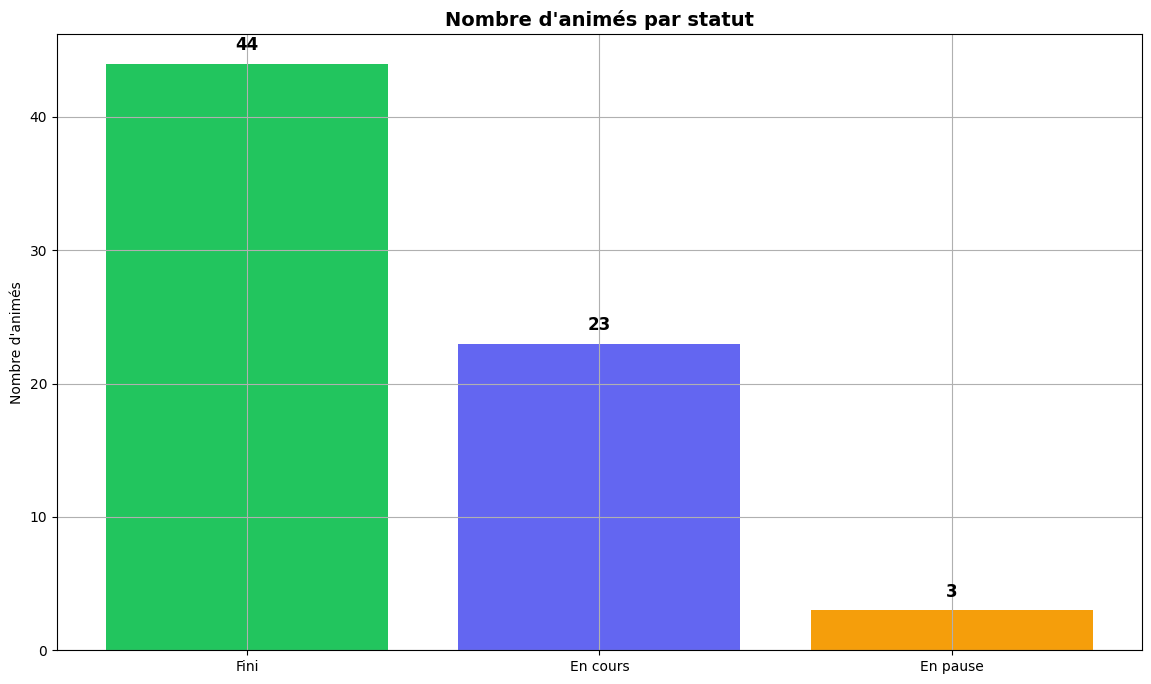

In [54]:
# Compter les animés par statut
statuts = df['Status'].value_counts()

# Créer le graphique
plt.figure(figsize=(14, 8))
couleurs = ['#22c55e', '#6366f1', '#f59e0b', '#ef4444']
bars = plt.bar(statuts.index, statuts.values, color=couleurs[:len(statuts)])

# Ajouter les valeurs sur les barres
for bar, val in zip(bars, statuts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            str(val), ha='center', fontweight='bold', fontsize=12)

plt.title("Nombre d'animés par statut", fontsize=14, fontweight='bold')
plt.ylabel("Nombre d'animés")
plt.show()

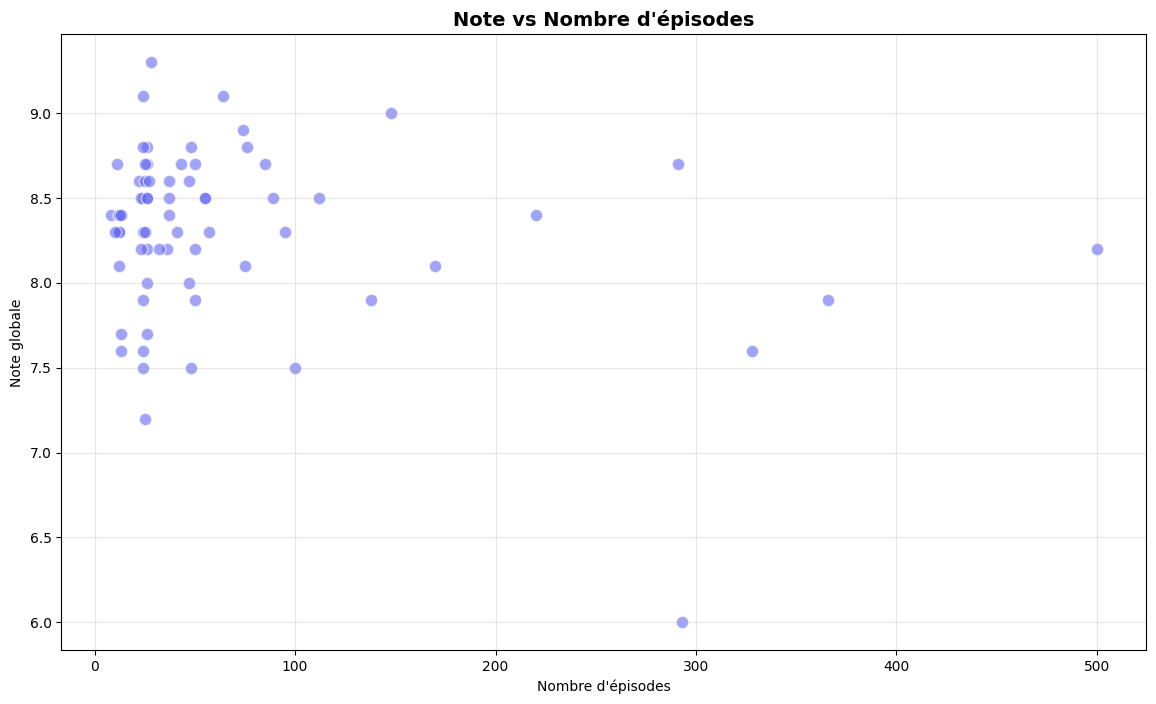

💡 Chaque point = un animé


In [55]:
# Nuage de points
plt.figure(figsize=(14, 8))

# Limiter à 500 épisodes max pour mieux voir
df_filtre = df[df['Nb_Episodes'] <= 500]

plt.scatter(df_filtre['Nb_Episodes'], df_filtre['Note_Globale'], 
           alpha=0.6, c='#6366f1', s=80, edgecolor='white')

plt.title("Note vs Nombre d'épisodes", fontsize=14, fontweight='bold')
plt.xlabel("Nombre d'épisodes")
plt.ylabel("Note globale")
plt.grid(True, alpha=0.3)
plt.show()

print("💡 Chaque point = un animé")

In [56]:
# Corrélation entre Note Globale et Note du Meilleur Épisode
corr = df['Note_Globale'].corr(df['Note_Meilleur_Ep'])

print(f"Corrélation Note Globale vs Note Meilleur Ep : {corr:.2f}")

# Interprétation
if corr > 0.5:
    print("\n📈 Corrélation POSITIVE forte !")
    print("   → Un bon épisode = souvent un bon animé")
elif corr > 0:
    print("\n📈 Corrélation POSITIVE faible")
else:
    print("\n📉 Corrélation NÉGATIVE")

Corrélation Note Globale vs Note Meilleur Ep : 0.29

📈 Corrélation POSITIVE faible


In [57]:
# Corrélation Note Globale vs Note du Pire Épisode
corr_pire = df['Note_Globale'].corr(df['Note_Pire_Ep'])

print(f"Corrélation Note Globale vs Note Pire Ep : {corr_pire:.2f}")

# Comparaison
print(f"\n📊 Récapitulatif :")
print(f"   • Note Meilleur Ep : forte corrélation positive")
print(f"   • Note Pire Ep    : corrélation plus faible")
print(f"\n💡 Un animé peut avoir un mauvais épisode et rester bien noté !")

Corrélation Note Globale vs Note Pire Ep : 0.41

📊 Récapitulatif :
   • Note Meilleur Ep : forte corrélation positive
   • Note Pire Ep    : corrélation plus faible

💡 Un animé peut avoir un mauvais épisode et rester bien noté !


In [ ]:
# Mon classement personnel
# Je calcule le rang pour la note et la régularité
df['Rang_Note'] = df['Note_Globale'].rank(ascending=False)
df['Rang_Reg'] = df['Regularite'].rank(ascending=False)

# J'additionne les deux rangs
df['Score_Final'] = df['Rang_Note'] + df['Rang_Reg']

# Je trie la liste par score croissant
df = df.sort_values(by='Score_Final', ascending=True)

#J'affiche mon top 10
df = df.reset_index(drop=True)
print(df[["Anime", "Score_Final", "Note_Globale","Regularite"]].head(10))

                           Anime  Score_Final  Note_Globale  Regularite
0                   Vinland Saga         21.0           8.8         8.5
1   Les Carnets de l'apothicaire         23.5           8.8         8.4
2                        Monster         24.0           8.9         8.3
3              Your Lie in April         24.5           8.6         8.9
4                       Mushishi         25.5           8.7         8.6
5                 Hajime no Ippo         26.5           8.8         8.3
6                    Steins;Gate         28.5           9.1         8.1
7                     Oshi no Ko         29.5           8.7         8.4
8  Frieren: Beyond Journey's End         34.0           9.3         7.9
9                            GTO         36.5           8.7         8.2


In [62]:
# J'enregistre mon classement final
df.to_csv("mon_classement_final.csv", index=False)

In [67]:
print(df.head(10))

                           Anime                    Genre_Tags        Source  \
0                   Vinland Saga             Adventure / Drama         Manga   
1   Les Carnets de l'apothicaire          Mystery / Historical   Light Novel   
2                        Monster            Thriller / Mystery         Manga   
3              Your Lie in April                 Drama / Music         Manga   
4                       Mushishi  Slice of Life / Supernatural         Manga   
5                 Hajime no Ippo                Sport / Boxing         Manga   
6                    Steins;Gate             Sci-Fi / Thriller  Visual Novel   
7                     Oshi no Ko               Drama / Mystery         Manga   
8  Frieren: Beyond Journey's End           Adventure / Fantasy         Manga   
9                            GTO        Comedy / Slice of Life         Manga   

   Nb_Episodes    Status              Studio   Date_Pub  Note_Globale  \
0           48  En cours  Wit Studio / MAPPA 2